In [3]:
# # Data Preprocessing
# import cv2
# import os

# folder_path = './data-hingshing-raw'
# output_dir = './data-hingshing'

# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# for filename in os.listdir(folder_path):
#     full_path = os.path.join(folder_path, filename)
    
#     # 读取 PNG 图片
#     img = cv2.imread(full_path)
    
#     # 调整大小为 160x160
#     resized_img = cv2.resize(img, (160, 160), interpolation=cv2.INTER_AREA)
    
#     # 保存为 JPG 格式
#     output_path = os.path.join(output_dir, f'{filename[:-4]}.jpg')
#     cv2.imwrite(output_path, resized_img, [int(cv2.IMWRITE_JPEG_QUALITY), 95])  # 95 是图像质量，范围 0-100

In [38]:
import os

data_path = './dataset-hingshing'
input_dir = os.path.join(data_path, 'real')
s1_dir = os.path.join(data_path, 'pred-front-s1')
s2_dir = os.path.join(data_path, 'pred-complete-s2')
s3_sj_dir = os.path.join(data_path, 'pred-complete-s3-sj')
s3_mj_dir = os.path.join(data_path, 'pred-complete-s3-mj')

if not os.path.exists(s1_dir):
    os.makedirs(s1_dir)
    
if not os.path.exists(s2_dir):
    os.makedirs(s2_dir)
    
if not os.path.exists(s3_sj_dir):
    os.makedirs(s3_sj_dir)
    
if not os.path.exists(s3_mj_dir):
    os.makedirs(s3_mj_dir)
    
files = []
names = []
for filename in os.listdir(input_dir):
    base_name = os.path.basename(filename)         # e.g., img123.jpg
    name_only = os.path.splitext(base_name)[0]       # e.g., img123
    files.append(base_name)
    names.append(name_only)

In [ ]:
# Testing
import subprocess

In [33]:
# Senario1
command1 = [
    './infer.sh',
    '-g', '0',
    '-c', 'checkpoint/RFINet_front_xferln_160k',
    '-o', s1_dir
]

for filename in files:
    filepath = os.path.join(input_dir, filename)
    command1.append(filepath)

subprocess.run(command1, check=True)

CompletedProcess(args=['python', 'xfernet.py', 'inference', '--checkpoint_dir', './checkpoint/xfer_complete_frompred_residual_mj', '--model_type', 'residual', '--dataset', 'mj', '--input_source', 'frompred', '--output', './dataset-hingshing/pred-complete-s3-mj', '--input', './dataset-hingshing/pred-front-s1/001_obj0_cls39_warp_square.png', './dataset-hingshing/pred-front-s1/001_obj1_cls39_warp_square.png'], returncode=0)

In [ ]:
# Senario2
command2 = [
    'python', 'xfernet.py', 'inference',
    '--checkpoint_dir', './checkpoint/xfer_complete_frompred_residual',
    '--model_type', 'residual',
    '--dataset', 'default',
    '--input_source', 'frompred',
    '--output', s2_dir,
    '--input'
]

for filename in names:
    filepath = os.path.join(s1_dir, filename + '.png')
    command2.append(filepath)
    
subprocess.run(command2, check=True)

In [ ]:
# Senario3
command3_1 = [
    'python', 'xfernet.py', 'inference',
    '--checkpoint_dir', './checkpoint/xfer_complete_frompred_residual_sj',
    '--model_type', 'residual',
    '--dataset', 'sj',
    '--input_source', 'frompred',
    '--output', s3_sj_dir,
    '--input'
]

for filename in names:
    filepath = os.path.join(s1_dir, filename + '.png')
    command3_1.append(filepath)

subprocess.run(command3_1, check=True)


command3_2 = [
    'python', 'xfernet.py', 'inference',
    '--checkpoint_dir', './checkpoint/xfer_complete_frompred_residual_mj',
    '--model_type', 'residual',
    '--dataset', 'mj',
    '--input_source', 'frompred',
    '--output', s3_mj_dir,
    '--input'
]

for filename in ['001_obj0_cls39_warp_square', '001_obj1_cls39_warp_square']:
    filepath = os.path.join(s1_dir, filename + '.png')
    command3_2.append(filepath)

subprocess.run(command3_2, check=True)

In [42]:
from PIL import Image
import matplotlib.pyplot as plt


def show_results_grid(name_list, mode='sj'):
    assert mode in ['sj', 'mj'], "mode must be 'sj' or 'mj'"
    
    n = len(name_list)
    fig, axes = plt.subplots(nrows=n, ncols=4, figsize=(16, 4 * n))
    
    if n == 1:
        axes = [axes]  # 保持二维结构

    col_titles = [
        'Real',
        'Front',
        'Complete frompred',
        f'Complete frompred {mode}'
    ]
    
    # 设置列标题
    for j in range(4):
        axes[0][j].set_title(col_titles[j], fontsize=14)

    for i, name in enumerate(name_list):
        paths = [
            f'{input_dir}/{name}.jpg',
            f'{s1_dir}/{name}.png',
            f'{s2_dir}/{name}.png',
            f'{s3_sj_dir if mode == "sj" else s3_mj_dir}/{name}.png'
        ]
        for j in range(4):
            try:
                img = Image.open(paths[j])
                axes[i][j].imshow(img)
                axes[i][j].axis('off')
            except Exception as e:
                axes[i][j].text(0.5, 0.5, f'Failed to load\n{paths[j]}', ha='center', va='center')
                axes[i][j].axis('off')

    plt.tight_layout()
    plt.show()

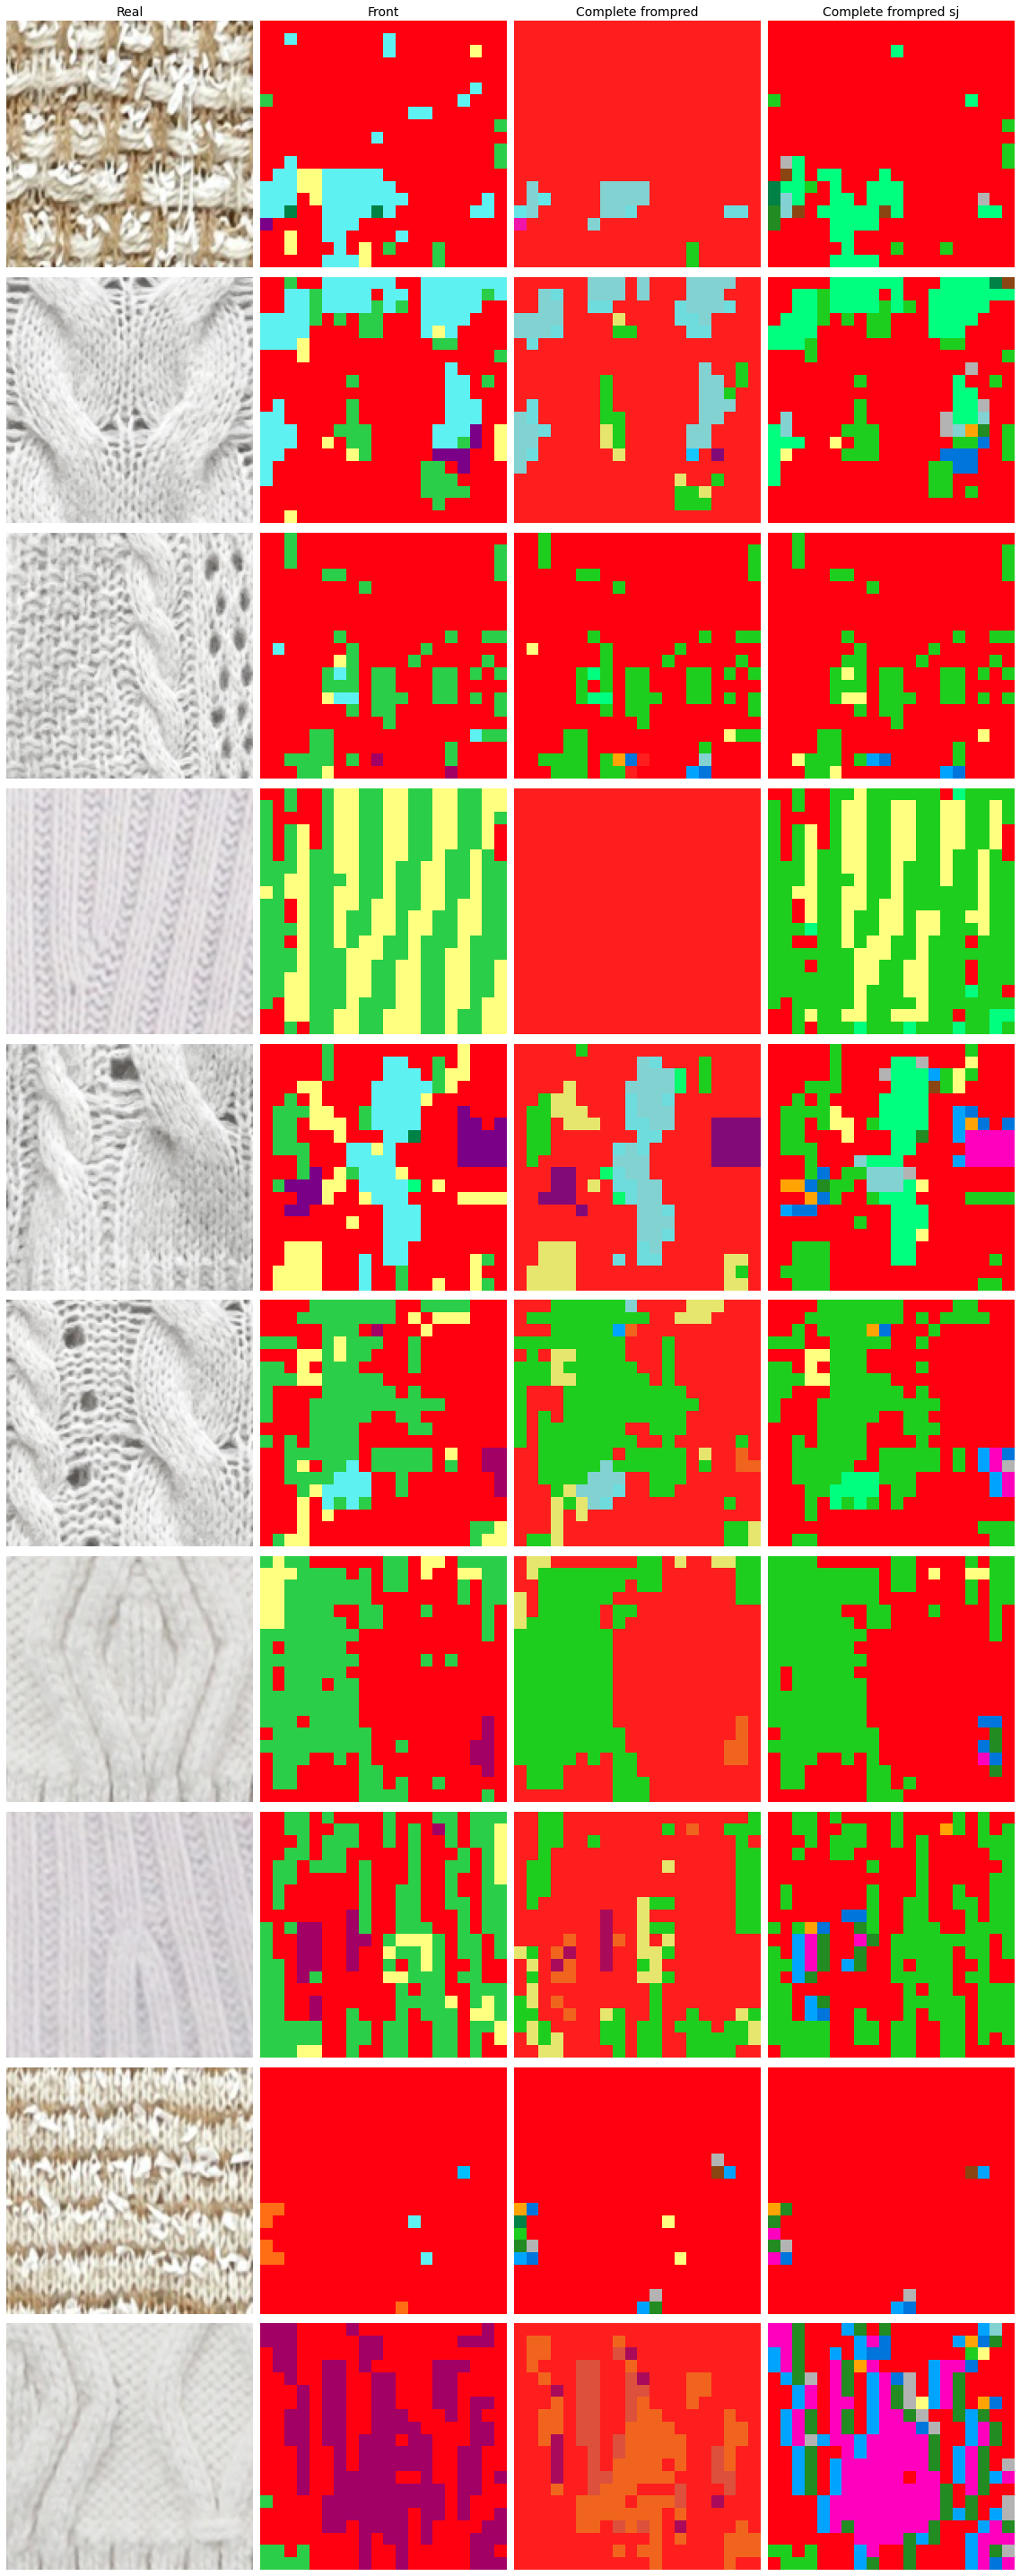

In [43]:
show_results_grid(names, 'sj')

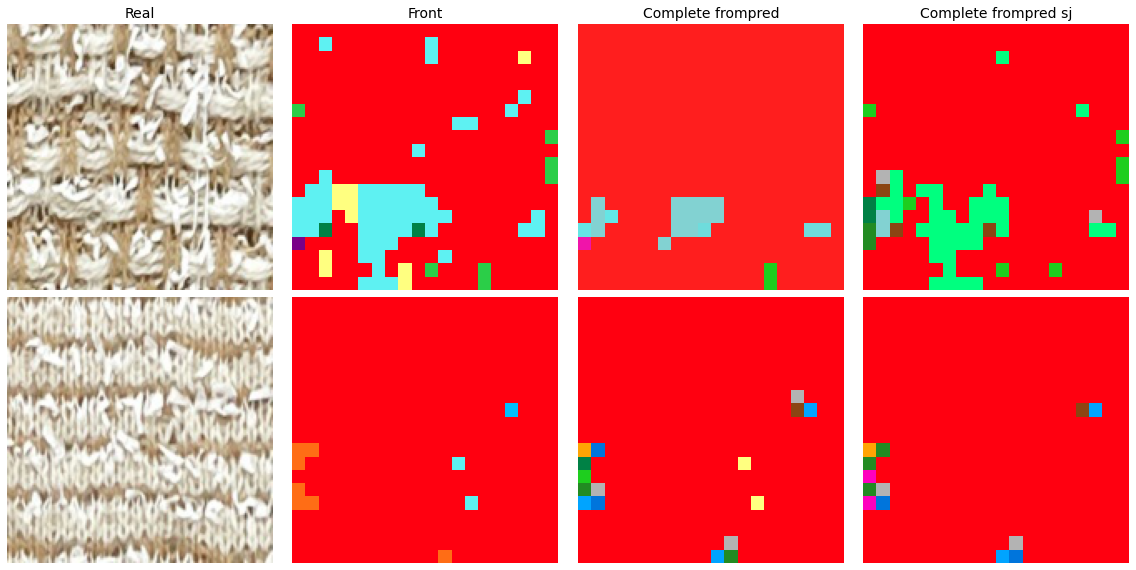

In [44]:
show_results_grid(['001_obj0_cls39_warp_square', '001_obj1_cls39_warp_square'], 'sj')